# Sepsis Challenge

Ines Krissaane

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import glob
from sklearn import linear_model
import datetime
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import learning_curve, GridSearchCV
import xgboost as xgb

In [5]:
import warnings
warnings.filterwarnings('ignore')
import glob
import skimage
import skimage.transform
import skimage.io
import PIL
import numpy as np
import os
from IPython.display import clear_output
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import imageio
import time
import tensorflow

## Analyse temporal series 

In [6]:
X_tr = pd.read_csv('sepsis_data_all.csv')


FileNotFoundError: [Errno 2] File b'sepsis_data_all.csv' does not exist: b'sepsis_data_all.csv'

In [7]:
dt = pd.read_csv('sepsis_data_setB.csv')

FileNotFoundError: [Errno 2] File b'sepsis_data_setB.csv' does not exist: b'sepsis_data_setB.csv'

In [8]:
X_tr.shape

NameError: name 'X_tr' is not defined

In [9]:
# Remove variables with more than 82% of na.
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride','Magnesium','Phosphate','Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb',  'Unnamed: 0','Fibrinogen', 'Platelets'
], axis = 1, inplace = True)

NameError: name 'X_tr' is not defined

In [10]:
X_tr.drop(['Unit1', "Unit2"], axis = 1, inplace = True)

NameError: name 'X_tr' is not defined

# Check variables of interest according to Jumanah 

In [11]:
creat = X_tr[X_tr.Creatinine > 0]
sum(creat[creat.SepsisLabel == 1].Creatinine)/len(creat[creat.SepsisLabel == 1].Creatinine)

NameError: name 'X_tr' is not defined

In [12]:
plt.hist(creat[creat.SepsisLabel == 1].Creatinine);
plt.title('Creatinine for patients with sepsis');

NameError: name 'creat' is not defined

In [13]:
sum(creat[creat.SepsisLabel == 0].Creatinine)/len(creat[creat.SepsisLabel == 0].Creatinine)

NameError: name 'creat' is not defined

In [14]:
plt.hist(creat[creat.SepsisLabel == 0].Creatinine);
plt.title('Creatinine for normal patients');

NameError: name 'creat' is not defined

In [12]:
def fun(var):
    ''' '''
    
    tab = X_tr[X_tr[var] > 0]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(14,10))
    ax1.hist(tab[tab.SepsisLabel == 1][var]);
    ax2.hist(tab[tab.SepsisLabel == 0][var]);

    m1, m2 = sum(tab[tab.SepsisLabel == 1][var])/len(tab[tab.SepsisLabel == 1][var]), sum(tab[tab.SepsisLabel == 0][var])/len(tab[tab.SepsisLabel == 0][var])
    plt.show()
    return  {'Anormal patients ': m1, 'Normal patients ': m2}

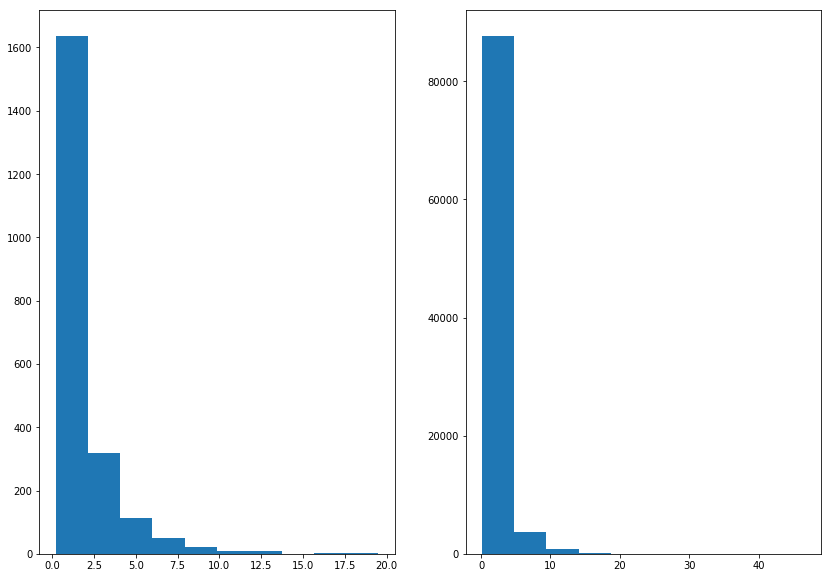

{'Anormal patients ': 1.8475948196114667,
 'Normal patients ': 1.5028211867523373}

In [13]:
fun('Creatinine')

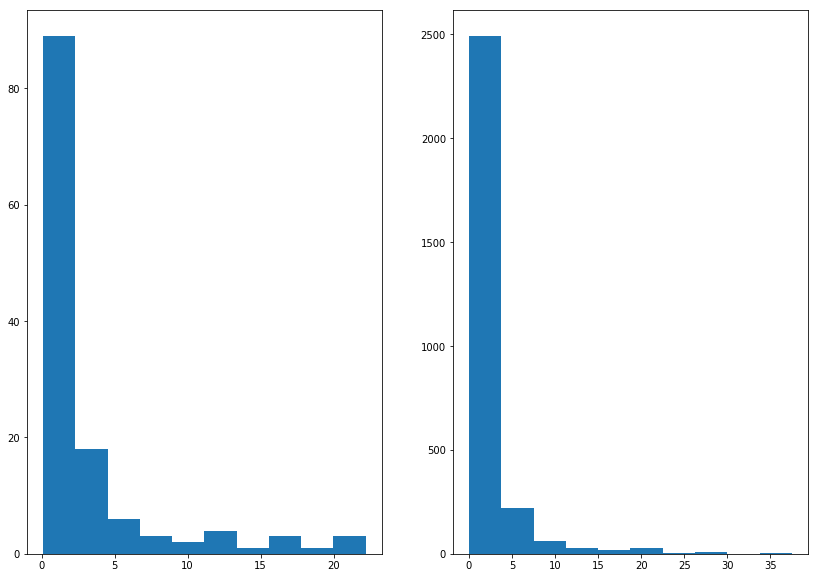

{'Anormal patients ': 2.8480769230769236,
 'Normal patients ': 1.790181818181834}

In [14]:
fun('Bilirubin_direct')

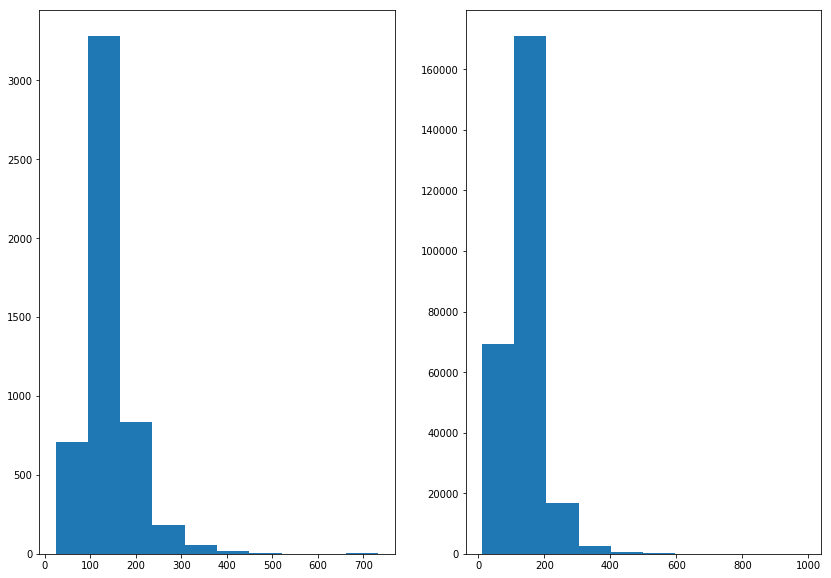

{'Anormal patients ': 140.02921822824592,
 'Normal patients ': 136.87174188345975}

In [15]:
fun('Glucose')

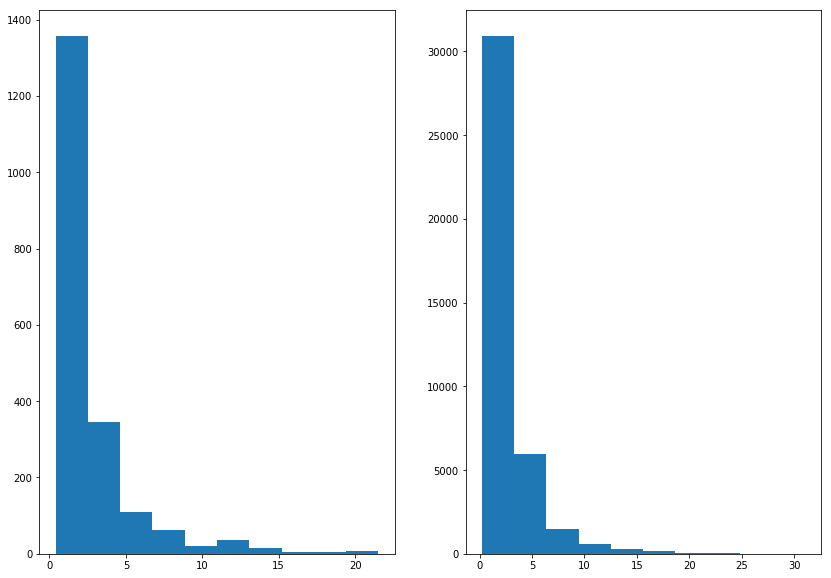

{'Anormal patients ': 2.726364099949005,
 'Normal patients ': 2.6427078637457524}

In [16]:
fun('Lactate')

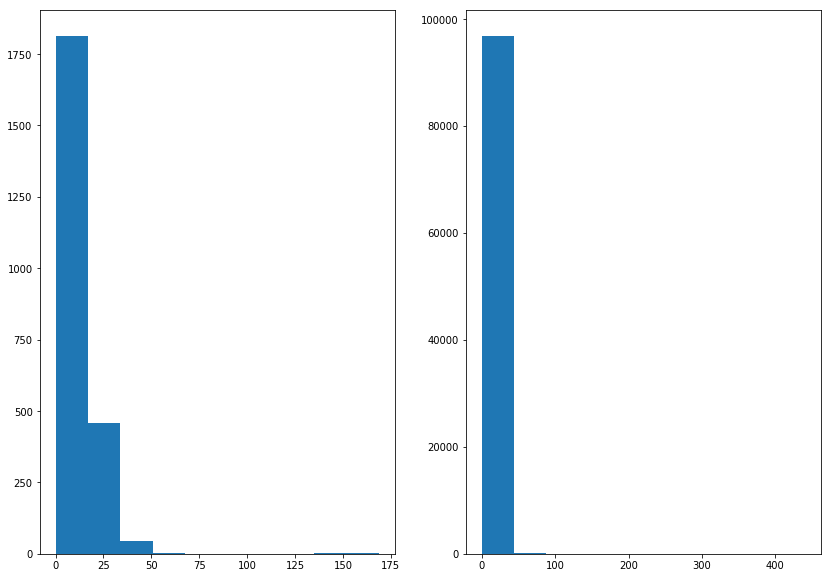

{'Anormal patients ': 13.325926881720433,
 'Normal patients ': 11.401411214761008}

In [17]:
fun('WBC')

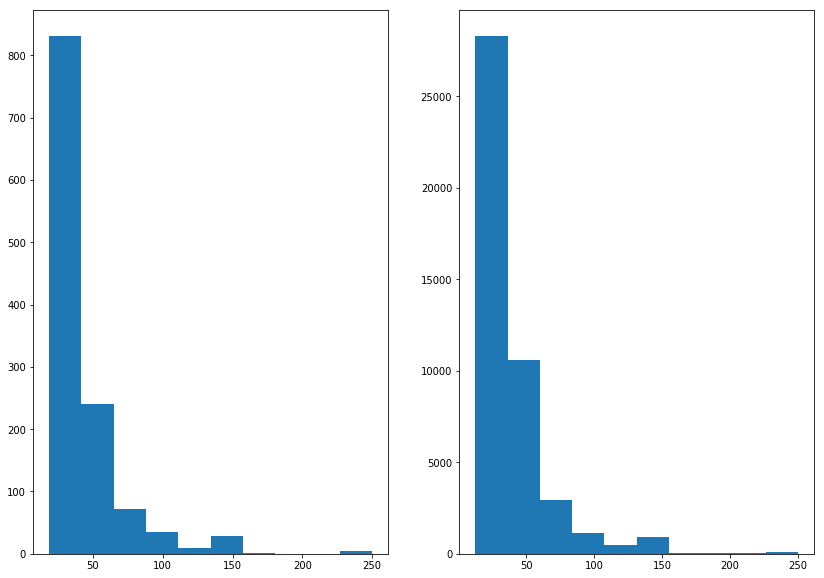

{'Anormal patients ': 43.99281045751639,
 'Normal patients ': 41.155190781337716}

In [18]:
fun('PTT')

In [19]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [20]:
X_tr.head()

,X,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Creatinine,Bilirubin_direct,Glucose,Lactate,PTT,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,ID
0,1,97.0,95.0,36.11,98.0,75.33,43.0,19.0,0.7,0.5,193.0,1.4,30.5,5.7,83.14,0,-0.03,1,0,1
1,2,97.0,95.0,36.11,98.0,75.33,43.0,19.0,0.7,0.5,193.0,1.4,30.5,5.7,83.14,0,-0.03,2,0,1
2,3,89.0,99.0,36.11,122.0,86.00,43.0,22.0,0.7,0.5,193.0,1.4,30.5,5.7,83.14,0,-0.03,3,0,1
3,4,90.0,95.0,36.11,122.0,91.33,43.0,30.0,0.7,0.5,193.0,1.4,30.5,5.7,83.14,0,-0.03,4,0,1
4,5,103.0,88.5,36.11,122.0,91.33,43.0,24.5,0.7,0.5,193.0,1.4,30.5,5.7,83.14,0,-0.03,5,0,1


In [21]:
normal = X_tr[X_tr['SepsisLabel'] == 0]
anormal = X_tr[X_tr['SepsisLabel'] == 1]

In [22]:
list_anormal = list(anormal.ID.unique() )
list_normal = list(normal.ID.unique() )
from random import sample 
sample(list_anormal,10)

[14037, 1698, 2027, 13096, 9393, 15836, 1748, 468, 2332, 15137]

In [23]:
df = X_tr
for i in (list_anormal):
    df = df[df.ID != i]

In [24]:
df.shape

(1277881, 20)

In [25]:
normal = df
list_normal = list(normal.ID.unique())

In [26]:
len(list_normal) + len(list_anormal)

20336

In [48]:
pd.loc?

Object `pd.loc` not found.


In [60]:
data = X_tr.loc[1:790215]

In [61]:
anormal = data[data['SepsisLabel'] == 1]

In [78]:
anormal

,X,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Creatinine,Bilirubin_direct,Glucose,Lactate,PTT,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,ID
552,553,119.0,100.0,37.94,140.0,106.00,85.0,26.5,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,249,1,9
553,554,118.0,96.0,37.39,138.0,108.00,88.0,26.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,250,1,9
554,555,111.0,97.0,37.39,136.0,106.00,86.0,26.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,251,1,9
555,556,116.0,96.0,37.72,143.0,109.00,88.0,30.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,252,1,9
556,557,120.0,97.0,35.50,138.0,106.00,85.0,32.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,253,1,9
557,558,82.0,100.0,35.50,112.0,79.50,63.0,14.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,254,1,9
558,559,82.0,100.0,35.50,112.0,79.50,63.0,14.0,0.9,0.5,115.0,2.20,29.9,8.7,27.92,1,-0.03,255,1,9
559,560,82.0,100.0,35.50,112.0,79.50,63.0,14.0,0.9,0.5,119.0,2.70,29.9,8.7,27.92,1,-0.03,256,1,9
560,561,82.0,100.0,35.50,112.0,79.50,63.0,14.0,0.9,0.5,119.0,2.70,29.9,8.7,27.92,1,-0.03,257,1,9
561,562,82.0,100.0,35.50,112.0,79.50,63.0,14.0,0.9,0.5,114.0,2.20,29.9,8.7,27.92,1,-0.03,258,1,9


In [79]:
list(anormal.ID.unique() )

[9,
 11,
 15,
 18,
 22,
 28,
 34,
 42,
 53,
 56,
 58,
 63,
 64,
 78,
 141,
 161,
 171,
 178,
 185,
 188,
 203,
 206,
 211,
 226,
 260,
 265,
 272,
 283,
 286,
 311,
 324,
 346,
 354,
 357,
 359,
 371,
 373,
 376,
 379,
 384,
 401,
 403,
 466,
 468,
 483,
 524,
 541,
 545,
 559,
 574,
 584,
 587,
 601,
 614,
 616,
 635,
 639,
 650,
 653,
 654,
 656,
 674,
 679,
 698,
 702,
 705,
 714,
 728,
 730,
 754,
 762,
 765,
 772,
 784,
 795,
 811,
 818,
 847,
 851,
 872,
 890,
 897,
 938,
 939,
 962,
 967,
 972,
 983,
 996,
 999,
 1040,
 1043,
 1069,
 1072,
 1084,
 1086,
 1088,
 1092,
 1118,
 1123,
 1128,
 1133,
 1144,
 1178,
 1183,
 1185,
 1192,
 1194,
 1201,
 1206,
 1226,
 1230,
 1245,
 1250,
 1260,
 1272,
 1273,
 1276,
 1277,
 1280,
 1288,
 1291,
 1298,
 1307,
 1319,
 1336,
 1352,
 1366,
 1368,
 1370,
 1384,
 1389,
 1399,
 1429,
 1433,
 1435,
 1439,
 1440,
 1441,
 1446,
 1461,
 1466,
 1485,
 1502,
 1519,
 1523,
 1547,
 1588,
 1605,
 1610,
 1625,
 1635,
 1646,
 1666,
 1668,
 1669,
 1670,
 1698,

### Heart Rate

In [80]:
def curve(var, n):
    '''Plot data from n patients who have sepsis at the time indicated by the red line for a specific variable var
    var = string for the feature
    n = square number for the total number of plots '''
    
    list_anormal = list(anormal.ID.unique() )
    fig, subplot_axes = plt.subplots(int(np.sqrt(n)),int(np.sqrt(n)), squeeze=False, figsize=(16,12))

    for it, p in enumerate(list(sample(list_anormal, n))) :
        onedf = data[data['ID'] == p]
        onedf.index = onedf.ICULOS
        ax = subplot_axes[it // int(np.sqrt(n))][it % int(np.sqrt(n))]
        ax.plot(data[data['ID'] == p].ICULOS,data[data['ID'] == p][var])
        ax.set_title('Patient number  %i' % p)
        ax.axvline(x=np.argmax(onedf['SepsisLabel']), color='red')
        ax.axvline(x=np.argmax(onedf['SepsisLabel'])+6, color='green');

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.show()
    return 

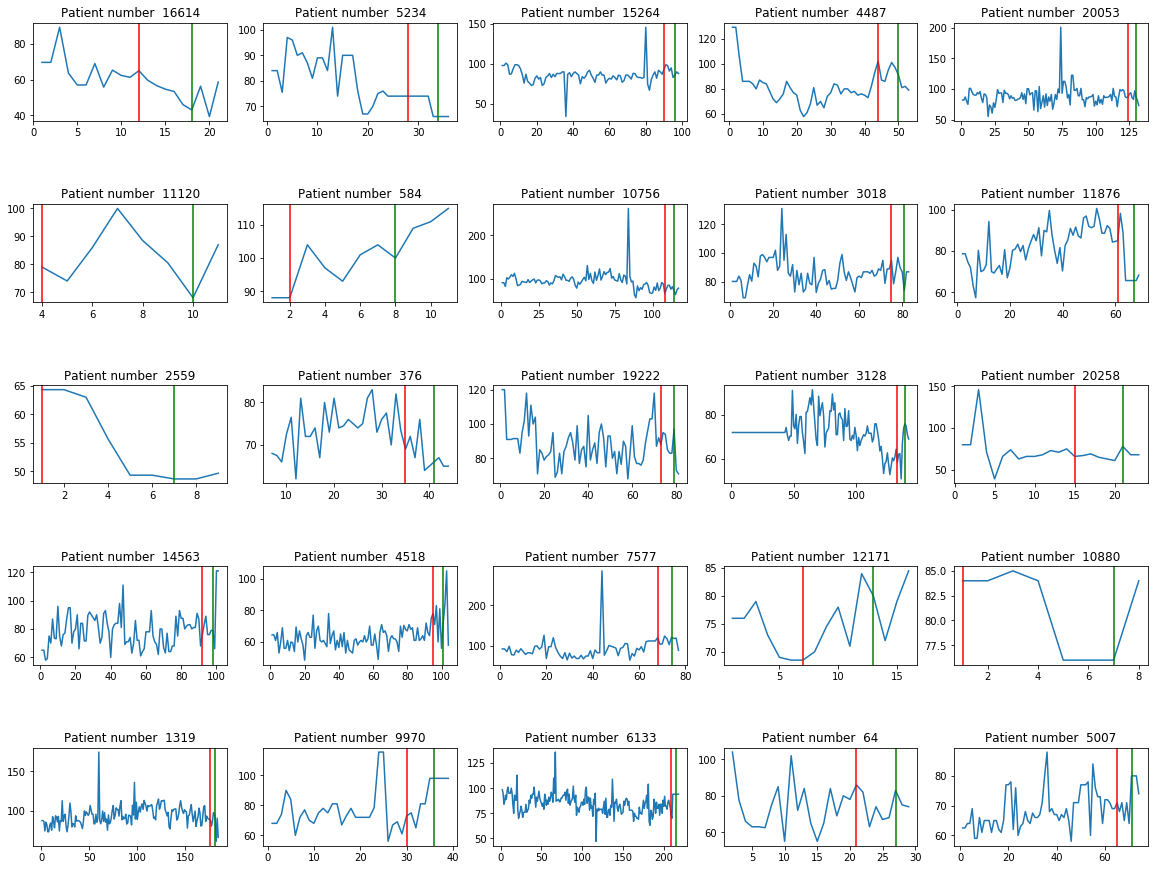

In [81]:
curve('MAP', 25)

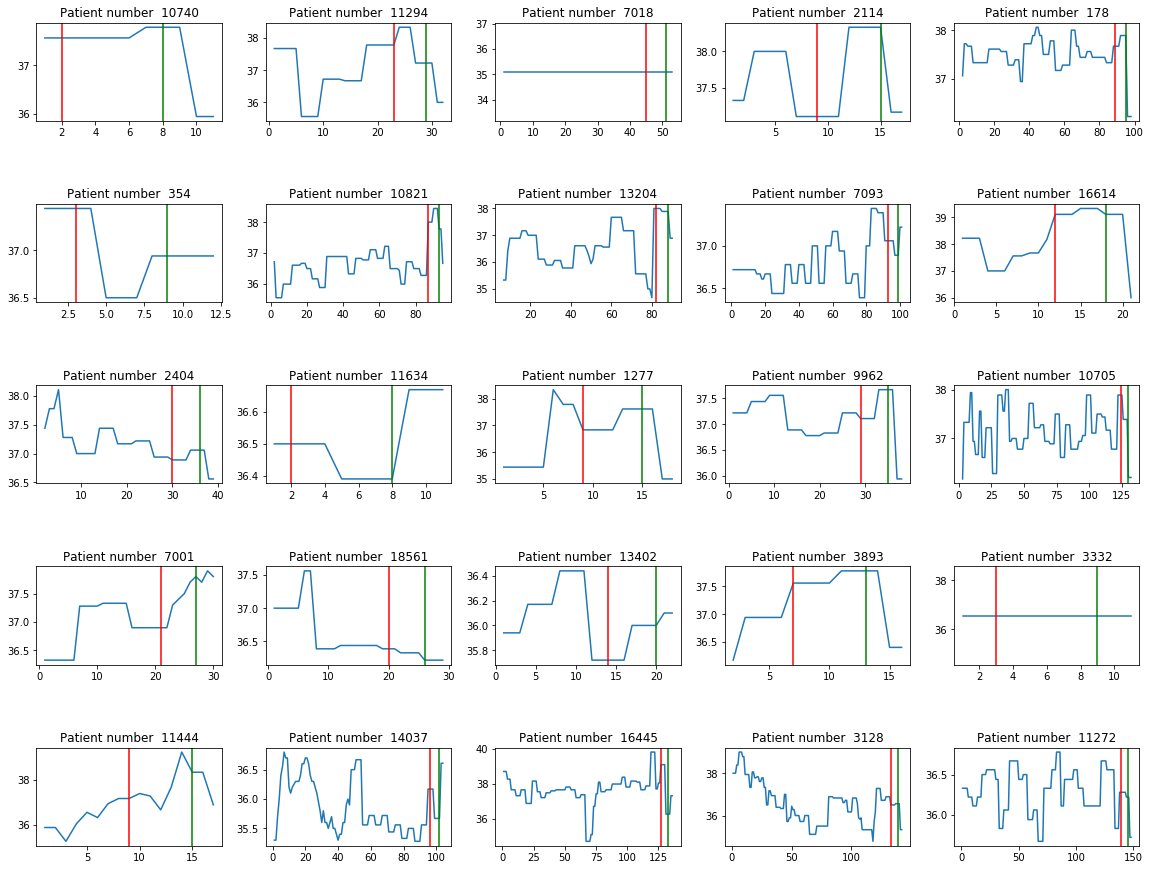

In [83]:
curve('Temp', 25)

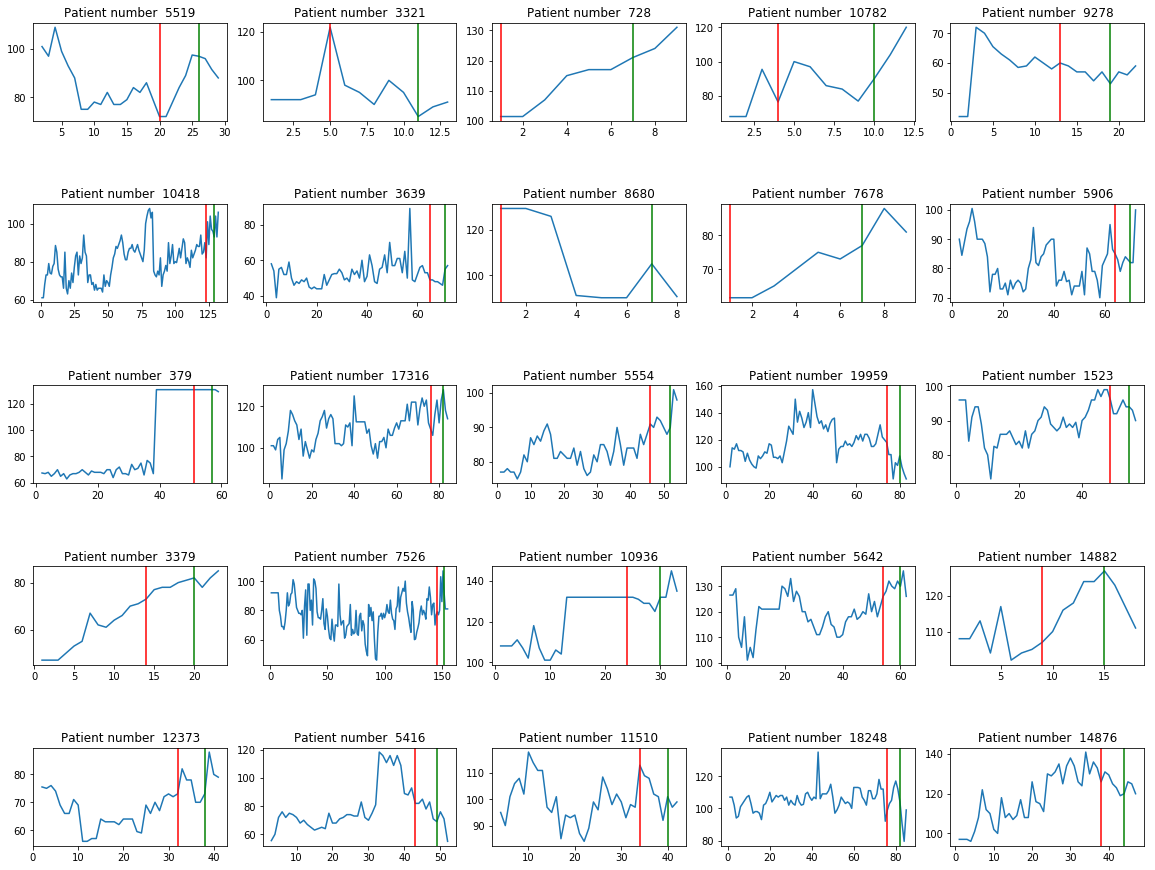

In [84]:
curve('HR',25)

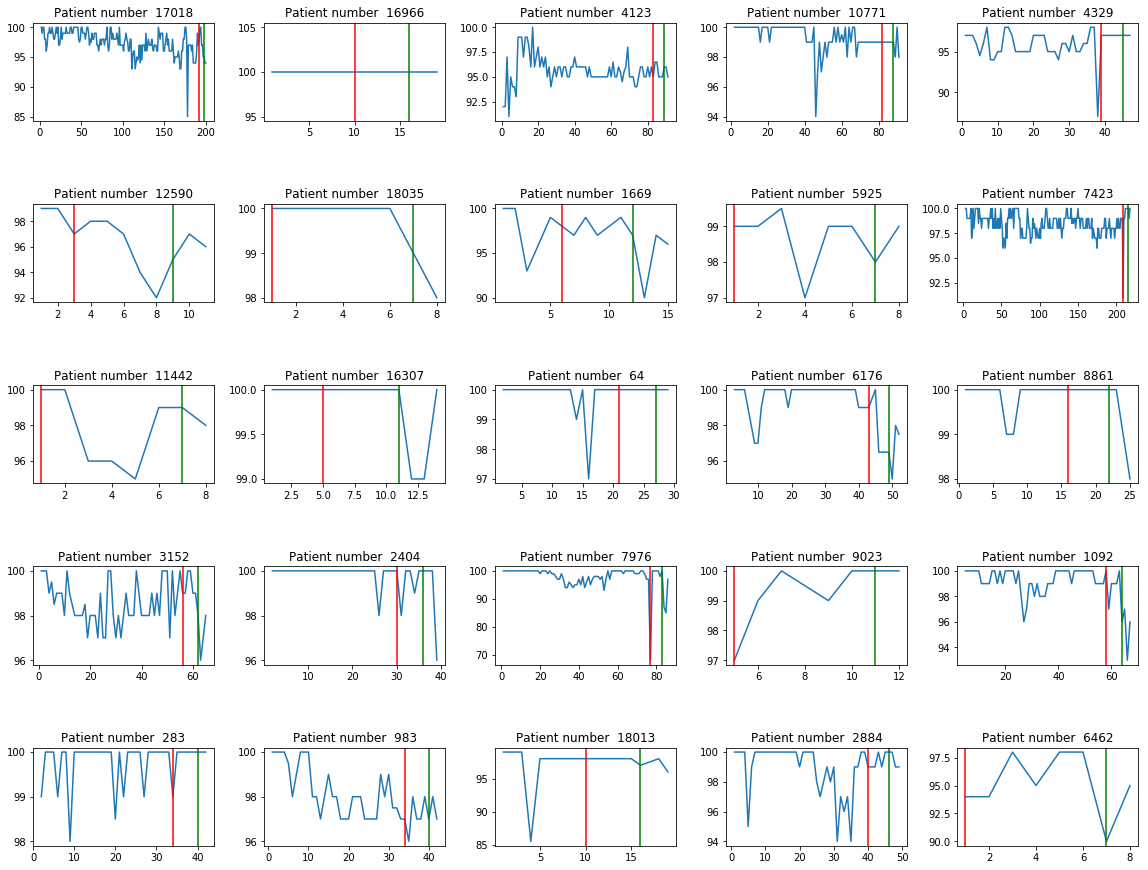

In [85]:
curve('O2Sat', 25)

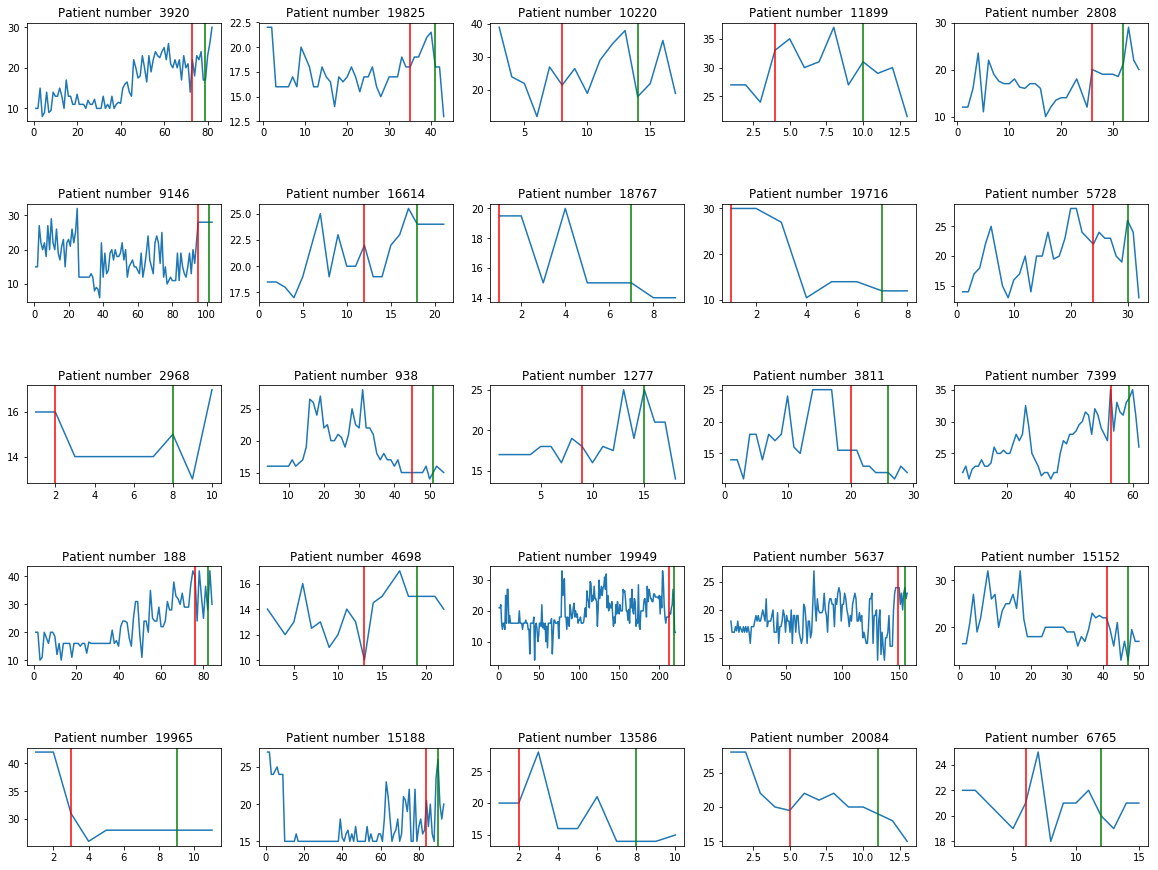

In [86]:
curve('Resp', 25)

### How many observations per patients ?

In [ ]:
data = pd.read_csv('lines_per_patients.csv')

In [ ]:
plt.hist(data.Nb);

In [ ]:
nb_normal = []
for i in (list_normal): 
    nb_normal.append(int(data[data.ID == i].Nb))

In [ ]:
nb_anormal = []
for i in (list_anormal): 
    nb_anormal.append(int(data[data.ID == i].Nb))

In [ ]:
bins = np.linspace(5, 170, 10)
plt.hist(nb_normal, bins, label='No Sepsis', color ='blue')
plt.hist(nb_anormal, bins,label='Sepsis', color ='red')
plt.legend(loc='upper right')
plt.title('Number of rows per patient for both groups')
plt.xlabel('Number of rows per patient')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
X_tr.head()

Considering the formula MAP = (SBP + 2*DBP) / 3 and the correlation between MAP and DBP, SBP.
Let's remove SBP and DBP.

Missing values fill in by mean, makes sense because almost all the patients are normal. And you find many missing values only in the variable Temperature Temp. 

## Create a label y-y0 and also y -mean(y) 

In [ ]:
l = []
for i in X_tr.ID.unique():
    onedf = X_tr[X_tr.ID == i]
    val = onedf.loc[onedf.index[0],'Resp']
    l.append(list(onedf.Resp - val))
    


In [ ]:
X_tr['Resp-Resp0'] = sum(l,[])

In [ ]:
X_tr.head(3)

In [ ]:
var = 'SBP'
l = []
for i in X_tr.ID.unique():
    onedf = X_tr[X_tr.ID == i]
    val = onedf.loc[onedf.index[0],var]
    l.append(list(onedf[var] - val))

In [ ]:
X_tr['DBP-DBP0'] = sum(l,[])

In [ ]:
var = 'Resp'
l = []
for i in X_tr.ID.unique():
    onedf = X_tr[X_tr.ID == i]
    l.append(list(onedf[var] - onedf[var].mean()))

In [ ]:
X_tr['Resp-Resp_mean'] = sum(l,[])

In [ ]:
l = []
var = 'Temp'
for i in X_tr.ID.unique():
    onedf = X_tr[X_tr.ID == i]
    l.append(list(onedf[var] - onedf[var].mean()))

In [ ]:
X_tr["%s-%s_mean" % (var, var)] = sum(l,[])

In [ ]:
variables = ['Resp','MAP','Temp','HR', 'O2Sat', 'SBP', 'DBP']
for var in variables :
    l = []
    for i in X_tr.ID.unique():
        onedf = X_tr[X_tr.ID == i]
        val = onedf.loc[onedf.index[0],var]
        l.append(list(onedf[var] - val))
    X_tr["%s-%s_0" % (var, var)] = sum(l,[])

In [ ]:
l = []
variables = ['Resp','MAP','Temp','HR', 'O2Sat', 'SBP', 'DBP']
for var in variables :
    l = []
    for i in X_tr.ID.unique():
        onedf = X_tr[X_tr.ID == i]
        l.append(list(onedf[var] - onedf[var].mean()))
    X_tr["%s-%s_mean" % (var, var)] = sum(l,[])

In [ ]:
var = 'hello'
"%s-%s_mean" % (var, var)

In [ ]:
X_tr.head()

In [ ]:
X_tr.shape

In [ ]:
X_tr.to_csv('datasetB_with_new_features.csv')

## Start here

In [194]:
X_tr = pd.read_csv('datasetA_with_new_features.csv')

In [195]:
X_tr.drop(['Unnamed: 0','Gender','O2Sat-O2Sat0', 'O2Sat','DBP', 'DBP-DBP_mean','DBP-DBP0','HR-HR0','Temp-Temp0',
           'SBP-SBP0','O2Sat-O2Sat0','Resp-Resp0','O2Sat-O2Sat_mean','MAP','MAP-MAP_mean','MAP-MAP0','ID','HospAdmTime' ], axis = 1, inplace = True)

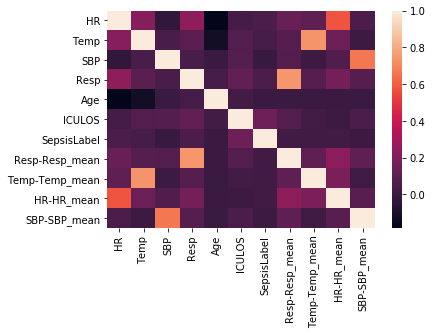

In [197]:
corr = X_tr.corr()
sns.heatmap(corr);

In [198]:
Y_tr = X_tr.SepsisLabel
X_tr.drop(['SepsisLabel'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X_tr,Y_tr,test_size=.3, random_state=40)

In [120]:
sum(y_train)

11954

In [121]:
sum(y_test)

5182

In [122]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (553150, 13)
Training Labels Shape: (553150,)
Testing Features Shape: (237065, 13)
Testing Labels Shape: (237065,)


## Random Forest

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


by default,

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Random forests are a combination of tree predictors
such that each tree depends on the values of a random
vector sampled independently and with the same
distribution for all trees in the forest. The
generalization error for forests converges a.s. to a limit
as the number of trees in the forest becomes large.
The generalization error of a forest of tree classifiers
depends on the strength of the individual trees in the
forest and the correlation between them. Using a
random selection of features to split each node yields
error rates that compare favorably to Adaboost
(Freund and Schapire[1996]), but are more robust with
respect to noise. Internal estimates monitor error,
strength, and correlation and these are used to show
the response to increasing the number of features used
in the splitting. Internal estimates are also used to
measure variable importance. These ideas are also
applicable to regression.

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train);

In [49]:
predictions = rf.predict(X_test)

In [50]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

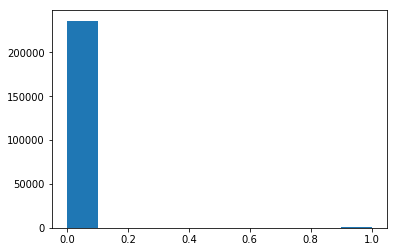

In [16]:
plt.hist(predictions);

In [17]:
feature_list = list(X_train.columns)

In [18]:
# Get numerical feature importances
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ICULOS               Importance: 0.09
Variable: Temp-Temp_mean       Importance: 0.06
Variable: Temp                 Importance: 0.05
Variable: Age                  Importance: 0.05
Variable: ID                   Importance: 0.05
Variable: HR                   Importance: 0.04
Variable: SBP                  Importance: 0.04
Variable: DBP                  Importance: 0.04
Variable: HospAdmTime          Importance: 0.04
Variable: MAP-MAP0             Importance: 0.04
Variable: Temp-Temp0           Importance: 0.04
Variable: HR-HR0               Importance: 0.04
Variable: Resp-Resp_mean       Importance: 0.04
Variable: MAP-MAP_mean         Importance: 0.04
Variable: HR-HR_mean           Importance: 0.04
Variable: O2Sat-O2Sat_mean     Importance: 0.04
Variable: SBP-SBP_mean         Importance: 0.04
Variable: MAP                  Importance: 0.03
Variable: Resp                 Importance: 0.03
Variable: Resp-Resp0           Importance: 0.03
Variable: O2Sat-O2Sat0         Importanc

In [19]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9819205703077215


In [8]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_tr,Y_tr, cv=5,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

In [ ]:
clfs = {}

clfs['ada'] = {'clf': AdaBoostClassifier(), 'name': 'AdaBoostClassifier'}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeClassifier(), 'name':'DecisionTreeClassifier'}
clfs['svc'] = {'clf': SVC(), 'name': 'SupportVectorClassifier'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

AdaBoostClassifier: 0.7842 (+/- 0.0181)
GradientBoostingClassifier: 0.7126 (+/- 0.2547)
RandomForest: 0.5544 (+/- 0.3046)
DecisionTreeClassifier: 0.5100 (+/- 0.0818)


In [9]:
clfs = {}

clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

KNeighborsClassifier: 0.4909 (+/- 0.0158)


In [ ]:
## imbalanced dataset
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

rf2.fit(X_train, y_train);

## AdaBoost Classifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. 

In [199]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = {
    'n_estimators' : [50],
    'learning_rate' : [0.3, 0.4]
}
# Create a based model
rf3 =  AdaBoostClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf3, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)




In [200]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   30.4s remaining:   30.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   30.5s finished


In [201]:
print ('Résultat de la grid search :', grid_search.best_score_, grid_search.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid_search.best_estimator_


Résultat de la grid search : 0.9783892253457471 {'learning_rate': 0.3, 'n_estimators': 50}


In [202]:
print ('Performance du modèle optimisé :', roc_auc_score(y_test,best.predict_proba(X_test)[:,1]))

Performance du modèle optimisé : 0.765628369077977


In [14]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = {
    'n_estimators' : [100, 200],
    'criterion' : ['gini'],
    'bootstrap': [True],
    'class_weight':[None, "balanced", "balanced_subsample"],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 5]
}
# Create a based model
rf3 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf3, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [15]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed: 32.1min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 33.6min finished


In [16]:
print ('Résultat de la grid search :', grid_search.best_score_, grid_search.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid_search.best_estimator_


Résultat de la grid search : 0.9811515863689777 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
print ('Performance du modèle optimisé :', roc_auc_score(y_test,best.predict_proba(X_test)[:,1]))

Performance du modèle optimisé : 0.9733701895240586


In [38]:
probabilities  = best.predict(X_test)

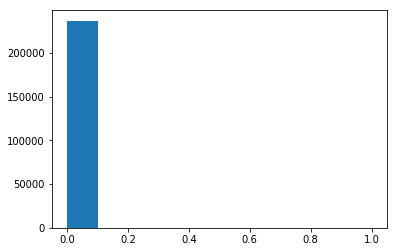

In [44]:
plt.hist(probabilities);

In [133]:
X_test.head()

,HR,Temp,SBP,Resp,Age,HospAdmTime,ICULOS,Temp-Temp0,HR-HR0,Resp-Resp_mean,Temp-Temp_mean,HR-HR_mean,SBP-SBP_mean
592173,62.0,36.39,133.0,18.0,64.58,-0.02,44,1.95,-68.0,-0.193878,-0.035714,-22.142857,14.346939
271482,88.0,36.94,182.0,22.0,23.25,-10.84,11,-0.17,9.0,4.594595,-0.142703,4.500000,38.878378
459015,60.0,35.56,150.5,26.0,86.50,-0.04,21,0.28,0.0,-3.239130,-0.856739,-0.173913,6.380435
98154,107.0,36.22,156.0,29.0,52.66,-0.01,6,0.61,3.0,-2.098039,-0.526863,-4.960784,32.921569
337028,82.0,36.22,95.0,27.0,86.62,-19.02,22,0.22,12.0,0.603448,-0.004828,1.275862,-5.068966


In [211]:
def code(file) :
    data = pd.read_csv(file , sep='|')
    data.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride',  'Bilirubin_direct' ,'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Fibrinogen', 'Platelets',
    "Unit1", 'Unit2', "Glucose", 'Creatinine','Gender','O2Sat','MAP','DBP','HospAdmTime'], axis = 1, inplace = True)
    
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    
   # data['ID'] = 1 * len(data['Temp'] )    

    
    Y_te = data.SepsisLabel
    data.drop(['SepsisLabel'], axis = 1, inplace = True)
    col = data.columns
#    if sum(pd.isna(data['MAP'])) !=0 : 
 #       data['MAP'] =  [87] * len(data['MAP'] )
    if sum(pd.isna(data['Temp'])) !=0 : 
        data['Temp'] =  [36.7] * len(data['Temp'] )
    if sum(pd.isna(data['HR'])) !=0 : 
        data['HR'] =  [83.9] * len(data['HR'] )
 #   if sum(pd.isna(data['O2Sat'])) !=0  :
  #      data['O2Sat'] =  [97.18] * len(data['O2Sat'] ) 
    if sum(pd.isna(data['Resp'])) !=0  :
        data['Resp'] =  [19.5] * len(data['Resp'] ) 
 #   if sum(pd.isna(data['DBP'])) !=0  :
  #      data['DBP'] =  [61.0] * len(data['DBP'] ) 
    if sum(pd.isna(data['SBP'])) !=0  :
        data['SBP'] =  [61.0] * len(data['SBP'] ) 
    
    variables = ['Resp','Temp','HR', 'SBP']
    for var in variables :
        #l = []
        l2 = []
        val = data.loc[data.index[0],var]
        #l.append(list(data[var] - val))
        #data["%s-%s0" % (var, var)] = sum(l,[])
        l2.append(list(data[var] - data[var].mean()))
        data["%s-%s_mean" % (var, var)] = sum(l2,[])
    
    #data.drop(['SBP-SBP0','Resp-Resp0'], axis = 1, inplace = True)
    
        

    return(data, Y_te)       

In [212]:
X_tr.head(2)

,HR,Temp,SBP,Resp,Age,ICULOS,Resp-Resp_mean,Temp-Temp_mean,HR-HR_mean,SBP-SBP_mean
0,97.0,36.11,98.0,19.0,83.14,1,-5.638889,-0.568333,-4.972222,-29.768519
1,97.0,36.11,98.0,19.0,83.14,2,-5.638889,-0.568333,-4.972222,-29.768519


In [213]:
def na (data):
    return(data.isnull().sum().sort_values(ascending=False)/data.isnull().count()).sort_values(ascending=False)


In [214]:
code('training_setB/p104796.psv')[0].head(2)

,HR,Temp,SBP,Resp,Age,ICULOS,Resp-Resp_mean,Temp-Temp_mean,HR-HR_mean,SBP-SBP_mean
0,60.0,36.3,61.0,18.0,63,1,-0.866667,-0.153333,-5.044444,0.0
1,60.0,36.3,61.0,18.0,63,2,-0.866667,-0.153333,-5.044444,0.0


In [183]:
X_test.head(2)

,HR,Temp,SBP,Resp,Age,HospAdmTime,ICULOS,Temp-Temp0,HR-HR0,Resp-Resp_mean,Temp-Temp_mean,HR-HR_mean,SBP-SBP_mean
592173,62.0,36.39,133.0,18.0,64.58,-0.02,44,1.95,-68.0,-0.193878,-0.035714,-22.142857,14.346939
271482,88.0,36.94,182.0,22.0,23.25,-10.84,11,-0.17,9.0,4.594595,-0.142703,4.500000,38.878378


In [215]:
def compute_auc(labels, predictions):
    # Check inputs for errors.

    # Find prediction thresholds.
    thresholds = np.unique(predictions)[::-1]
    if thresholds[0] != 1:
        thresholds = np.concatenate((np.array([1]), thresholds))

    if thresholds[-1] != 0:
        thresholds = np.concatenate((thresholds, np.array([0])))
    m = len(thresholds)

    # Populate contingency table across prediction thresholds.
    tp = np.zeros(m)
    fp = np.zeros(m)
    fn = np.zeros(m)
    tn = np.zeros(m)

    # Find indices that sort predicted probabilities from largest to smallest.
    idx = np.argsort(predictions)[::-1]

    i = 0
    for j in range(m):
        # Initialize contingency table for j-th prediction threshold.
        if j == 0:
            tp[j] = 0
            fp[j] = 0
            fn[j] = np.sum(labels == 1)
            tn[j] = np.sum(labels == 0)
        else:
            tp[j] = tp[j - 1]
            fp[j] = fp[j - 1]
            fn[j] = fn[j - 1]
            tn[j] = tn[j - 1]

        # Update contingency table for i-th largest prediction probability.
        while i < n and predictions[idx[i]] >= thresholds[j]:
            if labels[idx[i]]:
                tp[j] += 1
                fn[j] -= 1
            else:
                fp[j] += 1
                tn[j] -= 1
            i += 1

    # Summarize contingency table.
    tpr = np.zeros(m)
    tnr = np.zeros(m)
    ppv = np.zeros(m)
    npv = np.zeros(m)

    for j in range(m):
        if tp[j] + fn[j]:
            tpr[j] = tp[j] / (tp[j] + fn[j])
        else:
            tpr[j] = 1
        if fp[j] + tn[j]:
            tnr[j] = tn[j] / (fp[j] + tn[j])
        else:
            tnr[j] = 1
        if tp[j] + fp[j]:
            ppv[j] = tp[j] / (tp[j] + fp[j])
        else:
            ppv[j] = 1
        if fn[j] + tn[j]:
            npv[j] = tn[j] / (fn[j] + tn[j])
        else:
            npv[j] = 1

    # Compute AUROC as the area under a piecewise linear function of TPR /
    # sensitivity (x-axis) and TNR / specificity (y-axis) and AUPRC as the area
    # under a piecewise constant of TPR / recall (x-axis) and PPV / precision
    # (y-axis).
    auroc = 0
    auprc = 0
    for j in range(m-1):
        auroc += 0.5 * (tpr[j + 1] - tpr[j]) * (tnr[j + 1] + tnr[j])
        auprc += (tpr[j + 1] - tpr[j]) * ppv[j + 1]

    return auroc, auprc

# The compute_accuracy_f_measure function computes the accuracy and F-measure
# for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'accuracy' is a scalar that gives the accuracy of the classifier using its
#   binarized predictions.
#
#   'f_measure' is a scalar that gives the F-measure of the classifier using its
#   binarized predictions.
#
# Example:
#   In [1]: labels = [0, 0, 0, 0, 1, 1]
#   In [2]: predictions = [0, 0, 1, 1, 1, 1]
#   In [3]: accuracy, f_measure = compute_prediction_utility(labels, predictions)
#   In [4]: accuracy
#   Out[4]: 0.666666666667
#   In [5]: f_measure
#   Out[5]: 0.666666666667

def compute_accuracy_f_measure(labels, predictions):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    # Populate contingency table.
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for i in range(n):
        if labels[i] and predictions[i]:
            tp += 1
        elif labels[i] and not predictions[i]:
            fp += 1
        elif not labels[i] and predictions[i]:
            fn += 1
        elif not labels[i] and not predictions[i]:
            tn += 1

    # Summarize contingency table.
    if tp + fp + fn + tn:
        accuracy = float(tp + tn) / float(tp + fp + fn + tn)
    else:
        accuracy = 1.0

    if 2 * tp + fp + fn:
        f_measure = float(2 * tp) / float(2 * tp + fp + fn)
    else:
        f_measure = 1.0

    return accuracy, f_measure

# The compute_prediction_utility function computes the total time-dependent
# utility for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'utility' is a scalar that gives the total time-dependent utility of the
#   classifier using its binarized predictions.
#
# Example:
#   In [1]: labels = [0 0 0 0 1 1]
#   In [2]: predictions = [0 0 1 1 1 1]
#   In [3]: utility = compute_prediction_utility(labels, predictions)
#   In [4]: utility
#   Out[4]: 0.444444444444

def compute_prediction_utility(labels, predictions, dt_early=-12, dt_optimal=-6, dt_late=3.0, max_u_tp=1, min_u_fn=-2, u_fp=-0.05, u_tn=0):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    if dt_early >= dt_optimal:
        raise Exception('The earliest beneficial time for predictions must be before the optimal time.')

    if dt_optimal >= dt_late:
        raise Exception('The optimal time for predictions must be before the latest beneficial time.')

    # Does the patient eventually have sepsis?
    if any(labels):
        is_septic = True
        t_sepsis = min(i for i, label in enumerate(labels) if label) - dt_optimal
    else:
        is_septic = False
        t_sepsis = float('inf')

    # Define slopes and intercept points for affine utility functions of the
    # form u = m * t + b.
    m_1 = float(max_u_tp) / float(dt_optimal - dt_early)
    b_1 = -m_1 * dt_early
    m_2 = float(-max_u_tp) / float(dt_late - dt_optimal)
    b_2 = -m_2 * dt_late
    m_3 = float(min_u_fn) / float(dt_late - dt_optimal)
    b_3 = -m_3 * dt_optimal

    # Compare predicted and true conditions.
    u = np.zeros(n)
    for t in range(n):
        if t <= t_sepsis + dt_late:
            # TP
            if is_septic and predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = max(m_1 * (t - t_sepsis) + b_1, u_fp)
                elif t <= t_sepsis + dt_late:
                    u[t] = m_2 * (t - t_sepsis) + b_2
            # FN
            elif is_septic and not predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = 0
                elif t <= t_sepsis + dt_late:
                    u[t] = m_3 * (t - t_sepsis) + b_3
            # FP
            elif not is_septic and predictions[t]:
                u[t] = u_fp
            # TN
            elif not is_septic and not predictions[t]:
                u[t] = u_tn

    # Find total utility for patient.
    return np.sum(u)

def get_parser():
    parser = argparse.ArgumentParser(description = 'Evaluate classifiers for cohort.')
    parser.add_argument('-l', '--labels_directory',      type=str, required=True,  help='Labels directory')
    parser.add_argument('-p', '--predictions_directory', type=str, required=True,  help='Predictions directory')
    parser.add_argument('-o', '--output_file',           type=str, required=False, help='Output filename')
    return parser

def run(args):
    auroc, auprc, accuracy, f_measure, utility = compute_scores_2019(args.labels_directory, args.predictions_directory)

    output_string = 'AUROC|AUPRC|Accuracy|F-measure|Utility\n{}|{}|{}|{}|{}'.format(auroc, auprc, accuracy, f_measure, utility)

    if args.output_file:
        with open(args.output_file, 'w') as f:
            f.write(output_string)
    else:
        print(output_string)

In [217]:
best.predict_proba(code(glob.glob("training_setB/*.psv")[0])[0])[:,1]

array([0.43354211, 0.43354211, 0.43260866, 0.43634829, 0.43086946,
       0.43328315, 0.43328315, 0.43479929, 0.43303553, 0.43479929,
       0.42960708, 0.42800928, 0.43148748, 0.43152701, 0.42985346,
       0.43123679, 0.42803164, 0.42530207, 0.42608279, 0.42278031,
       0.42608279, 0.42701062, 0.42851816, 0.42922464, 0.42844246,
       0.42379613, 0.42298322, 0.42196764, 0.42721718, 0.42253498,
       0.42513515, 0.42589348, 0.42298322, 0.42567007, 0.42656538,
       0.42457612, 0.42415668, 0.42738114, 0.42599662, 0.42725456,
       0.42901703, 0.42875646, 0.42909498, 0.43062907])

In [218]:
for tau in np.arange(0.2,0.6,0.1):
    print(tau)

0.2
0.30000000000000004
0.4000000000000001
0.5000000000000001


In [245]:
utility = []
optimal = []
nopred=[]

tau = 0.5

for file in glob.glob("training_setB/*.psv"):  
    Y_te =  code(file)[1]
    X_te = code(file)[0]
    

    
    probabilities = best.predict_proba(X_te)[:,1]
    
    
    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < tau:   
            predictions.append(0)
        else :
            predictions.append(1)
        

    labels = Y_te
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))

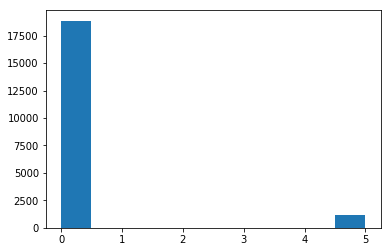

In [242]:
plt.hist(optimal);

In [ ]:
plt.hist(utility);

In [238]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) 

0.6865351122300042

In [240]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) 

0.3134648877699943

In [244]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) 

0.6880999053118023

In [246]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) 

0.6880999053118023

In [220]:
utility = []
optimal = []
acc=[]
nopred=[]

file ="training_setB/p100010.psv"
Y_te = code(file)[1]
X_te = code(file)[0]
    

probabilities = best.predict_proba(X_te)[:,1]
    
sc=[]
for tau in np.arange(0.1,1,0.001):
        
        predictions = [] 
        for i in range (len(probabilities)):
            if probabilities[i] < tau:   
                predictions.append(0)
            else :
                predictions.append(1)
        
        labels = Y_te
        fake = []
        for i in labels :
            fake.append(1-i)


        n = len(labels)

        cohort_labels        = []
        cohort_predictions   = []
        cohort_probabilities = []

        cohort_labels.append(labels)
        cohort_predictions.append(predictions)
        cohort_probabilities.append(probabilities)
        labels        = np.concatenate(cohort_labels)
        predictions   = np.concatenate(cohort_predictions)
        probabilities = np.concatenate(cohort_probabilities)

        auroc, auprc        = compute_auc(labels, probabilities)
        accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
        acc.append(accuracy)
        utility.append(compute_prediction_utility(labels, predictions))
        optimal.append(compute_prediction_utility(labels, labels))
        nopred.append(compute_prediction_utility(labels, fake))
        
        sc.append((sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)))


opt_tau = np.arange(0.1,1,0.001)[sc.index(max(sc))]
print(opt_tau)


                
labels = Y_te
fake = []
for i in labels :
    fake.append(1-i)


n = len(labels)

cohort_labels        = []
cohort_predictions   = []
cohort_probabilities = []
cohort_labels.append(labels)
cohort_predictions.append(predictions)
cohort_probabilities.append(probabilities)
labels        = np.concatenate(cohort_labels)
predictions   = np.concatenate(cohort_predictions)
probabilities = np.concatenate(cohort_probabilities)
auroc, auprc        = compute_auc(labels, probabilities)
accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
acc.append(accuracy)
utility.append(compute_prediction_utility(labels, predictions))
optimal.append(compute_prediction_utility(labels, labels))
nopred.append(compute_prediction_utility(labels, fake))



0.9990000000000008


In [234]:
compute_prediction_utility(labels, predictions)

0.0

In [222]:
utility

[-0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,

In [223]:
predictions 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

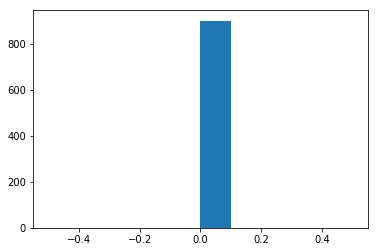

In [225]:
plt.hist(optimal);

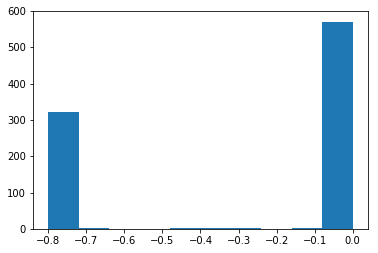

In [226]:
plt.hist(utility);

In [227]:
sc.index(max(sc))

899

In [228]:
np.arange(0.1,1,0.001)[sc.index(max(sc))]

0.9990000000000008

In [229]:
len(sc)

900

In [230]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) 

0.6390815760266316

In [231]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.3

0.6390815760266316

In [232]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.4

0.6390815760266316

# Save Adaboost Model

In [247]:
# save the model to disk
import pickle
filename = 'adaboostJuly8.sav'
pickle.dump(best, open(filename, 'wb'))

## Save a RF model

In [ ]:
# save the model to disk
import pickle
filename = 'random_forest_July2.sav'
pickle.dump(best, open(filename, 'wb'))

In [6]:
!pip install dill==0.2.7.1

    100% |████████████████████████████████| 71kB 3.5MB/s ta 0:00:01
  Stored in directory: /Users/ines_admin/Library/Caches/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
Successfully built dill


In [7]:
import dill


In [9]:
dill.dump(loaded_model, open( "RF_July5.obj","wb"))

In [11]:
model = dill.load(open("RF_July5.obj","rb"))

In [15]:
result = model.score(X_test, y_test )
print(result)


0.9823508320502816


## unzip a file 

In [6]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "random_forest_July2.sav.zip"
  
# opening the zip file in READ mode 


In [12]:
with ZipFile("random_forest_July2.sav.zip", 'r') as zip: 

        zip.printdir() 
        zip.extractall() 
 

File Name                                             Modified             Size
random_forest_July2.sav                        2019-07-05 09:48:12    313438219


In [8]:
loaded_model = zip

In [9]:
result = loaded_model.score(X_test, y_test )
print(result)

AttributeError: 'ZipFile' object has no attribute 'score'

In [10]:
import pickle
loaded_model = pickle.load(open('random_forest_July2.sav', 'rb'))

In [11]:
result = loaded_model.score(X_test, y_test )
print(result)

0.9823508320502816


In [132]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.5

0.7198774392562682

In [134]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.4

0.7546135163318035

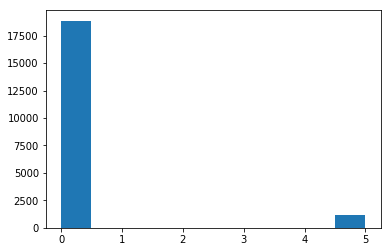

In [126]:
plt.hist(optimal);

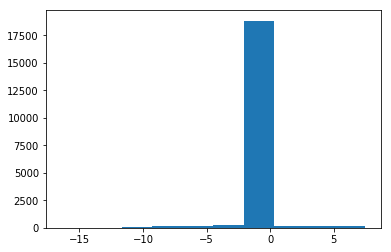

In [141]:
plt.hist(utility);

In [128]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.5

0.7159434660239357

In [129]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.4

0.7159434660239357

In [138]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.3

0.7552109563725963

In [140]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.2

0.7010012541555486

In [ ]:
from sklearn.externals import joblib

In [ ]:
# save the model to disk
filename = 'regression_model.sav'
joblib.dump(clf, filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test )
print(result)


In [ ]:
clf.predict_proba(X_te[0:1])[:,1]

## Xgboost

In [ ]:
X_tr = pd.read_csv('sepsis_data_all.csv')

In [ ]:
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' , 'Resp','Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Fibrinogen', 'Platelets',
    "Unit1", 'Unit2', "Glucose",'HospAdmTime','Unnamed: 0', 'ID','DBP','X','Temp','Age','Gender'], axis = 1, inplace = True)
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

Y_tr = X_tr.SepsisLabel
X_tr.drop(['SepsisLabel'], axis = 1, inplace = True)


In [ ]:
X_tr.tail()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,Y_tr,test_size=.3, random_state=42)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
num_boost_round = 999

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth': 11,
    'min_child_weight': 5,
    'eta':.01,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric': 'rmse'
}

In [ ]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,12)
    for min_child_weight in range(1,7)
]

In [ ]:
min_mae = float("Inf")


best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = .01

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

In [ ]:
best_model.save_model("my_xgboost_model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_xgboost_model")

In [ ]:
loaded_model.predict(dtest)

In [ ]:
model =  RandomForestRegressor(n_estimators=200)
model.fit(X_tr,Y_tr)

In [ ]:
print(best_model)

In [ ]:
sum(Y_tr == 0)/len(Y_tr)

In [ ]:
utility = []
optimal = []
nopred=[]
acc=[]
number_un = []
for file in glob.glob("training_setB/*.psv")[10000:20000]:  #[3200:5000]
    Y_te =  code(file)[1]
    X_te = code(file)[0]
    number_un.append(sum(Y_te))
   # print(file)
   # 1 probabilities  = model.predict(X_te)
    
    #2 
    dtest = xgb.DMatrix(X_te, label= Y_te)
    probabilities = best_model.predict(dtest)


    #probabilities = model.predict_proba(X_te)[:,1]
    #predictions = model.predict(X_te)
    for counter, value in enumerate(probabilities):
        if value > 0.1:
            if counter < (len(probabilities)-3) :
                probabilities[counter+1] = 1
                probabilities[counter+2] = 1
                probabilities[counter+3] = 1
    
    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < 0.5 :   # 1 0.35
            predictions.append(0)
        else :
            predictions.append(1)

    labels = Y_te
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
    acc.append(accuracy)
    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.5

In [ ]:
## xgbabsoost
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_tr, label=Y_tr)

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric' : 'mae'
}



In [ ]:
Y_train = data.SepsisLabel

In [ ]:
data.drop(['SepsisLabel'], axis = 1, inplace = True)

In [ ]:
X_tr,X_te,Y_tr,Y_te = train_test_split(data, Y_train, random_state =24 , test_size = 0.5) 

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
# Choix du premier modèle qui semble évident : régréssion linéaire
model = LinearRegression()
model.fit(X_tr,Y_tr)

In [ ]:
# On test sur le jeu de validation
predictions = model.predict(X_te) #On prédit le jeu de validation
print ('Erreur de la régréssion linéaire sur le jeu de validation : ', rmse(predictions,Y_te) )

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_te,predictions)

In [ ]:

model = RandomForestRegressor(random_state = 1234) 
model.fit(X_tr,Y_tr) # On fait apprendre sur le jeu d'apprentissage entier + cible
probabilities  = model.predict(X_te)
print ( 'Erreur d\'une random forest non optimisée sur le jeu de test : ', rmse(probabilities ,Y_te))

In [ ]:
model = RandomForestRegressor(random_state = 1234) 
model = XGBRegressor(n_estimators=1000) 
model.fit(X_tr,Y_tr) # On fait apprendre sur le jeu d'apprentissage entier + cible
probabilities = model.predict(X_te)
print('Erreur d\'un ExtremBoosting non optimisé sur le jeu de test : ', rmse(probabilities,Y_te) )

In [ ]:
model = KNeighborsClassifier().fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
predictions = model.predict(X_te)

In [ ]:
model = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 30,p= 1, weights= 'distance').fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
predictions = model.predict(X_te)


In [ ]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_tr,Y_tr, cv=5,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

In [ ]:

clfs = {}

clfs['ada'] = {'clf': AdaBoostClassifier(), 'name': 'AdaBoostClassifier'}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeClassifier(), 'name':'DecisionTreeClassifier'}
#clfs['svc'] = {'clf': SVC(), 'name': 'SupportVectorClassifier'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

In [ ]:
reg = {}

reg['LR'] = {'reg' : LinearRegression(), 'name' : 'LinearRegression'}
reg['RF'] = {'reg' : RandomForestRegressor() , 'name' : 'RandomForestRegressor'}
reg['XGB'] = {'reg' : XGBRegressor()  , 'name' : 'XGBRegressor'}


def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['reg'], X_tr,Y_tr, cv=5, scoring = 'roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

        
Evaluation(reg)

In [ ]:
model = KNeighborsClassifier().fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
print ('Performance du modèle :', roc_auc_score(Y_te, probabilities))

In [ ]:
from sklearn.grid_search import GridSearchCV

#Attention, cela peut être long !
model = KNeighborsClassifier()

params = {
    'n_neighbors' : [5,10,15],
    'weights' : ['uniform' , 'distance'],
    'p': [1, 2],
    'algorithm' : ['auto']
}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_tr,Y_tr)

In [ ]:
print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_

print ('Performance du modèle optimisé :', roc_auc_score(Y_te,best.predict_proba(X_te)[:,1]))

In [ ]:
model = RandomForestRegressor() 

params = {
    'n_estimators' : [100],
    'criterion' : ['mse'],
    'max_features' :['auto','sqrt','log2']
    
    
}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_tr,Y_tr)

In [ ]:
print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_



In [ ]:

probabilities  = best.predict(X_te)
print ( 'Erreur d\'une random forest non optimisée sur le jeu de test : ', rmse(probabilities ,Y_te))
